**Importing Libraries and Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train = pd.read_csv('fashion-mnist_train.csv',sep=',')
df_test = pd.read_csv('fashion-mnist_test.csv',sep=',')

In [3]:
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Visualising the Dataset**

In [4]:
df_train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.tail(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [6]:
df_train.shape

(60000, 785)

In [7]:
df_test.shape

(10000, 785)

In [9]:
training = np.array(df_train,dtype='float32')
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
testing = np.array(df_test,dtype='float32')
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Text(0.5, 1.0, '6.0')

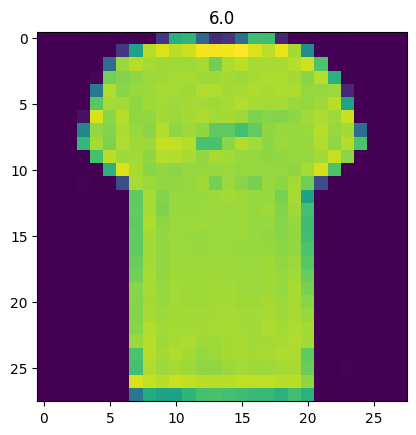

In [23]:
plt.imshow(training[10,1:].reshape(28,28))

9.0

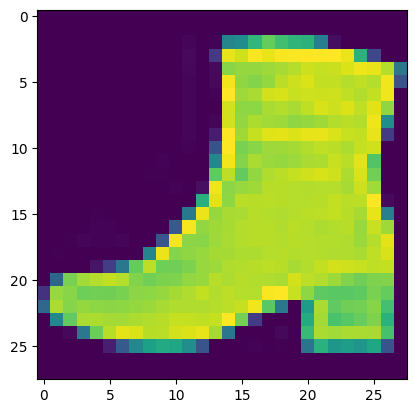

In [29]:
import random
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

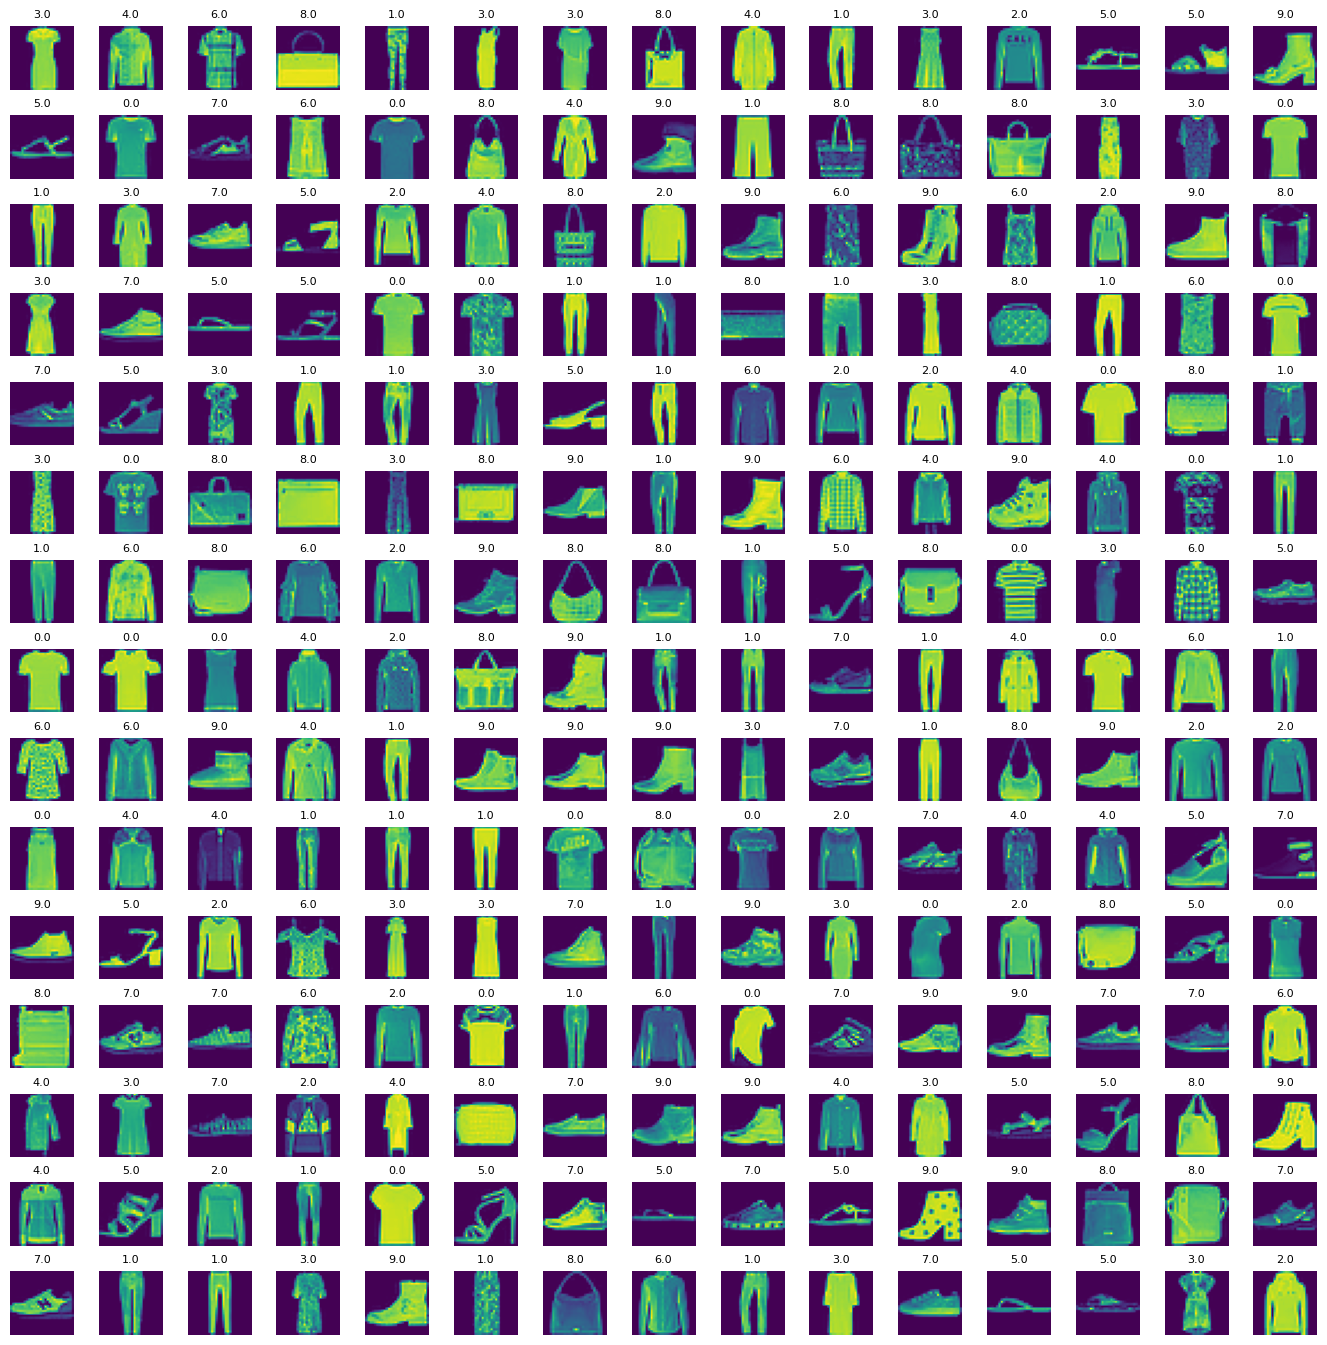

In [30]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot


**Model Training**

In [31]:
X_train = training[:,1:]/255    #normalization
y_train = training[:,0]

In [32]:
X_test = testing[:,1:]/255    #normalization
y_test = testing[:,0]

In [33]:
#take a part of training data and make it validation data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.2,random_state=12345)

In [34]:
#now all our data is of the form of numpy arrays.
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_valid = X_valid.reshape(X_valid.shape[0],*(28,28,1))

In [36]:
X_train.shape   #48000 samples where each is 28,28,1 where 1 means grayscale

(48000, 28, 28, 1)

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [43]:
model = Sequential()
model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))   

In [44]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

c:\Users\Devansh Gupta\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [46]:
model.fit(X_train,y_train,batch_size=32,epochs=50,verbose=1,validation_data=(X_valid,y_valid))

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3737 - accuracy: 0.8623 - val_loss: 0.3980 - val_accuracy: 0.8538
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3484 - accuracy: 0.8720 - val_loss: 0.3709 - val_accuracy: 0.8620
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3423 - accuracy: 0.8740 - val_loss: 0.3844 - val_accuracy: 0.8573
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3348 - accuracy: 0.8770 - val_loss: 0.3607 - val_accuracy: 0.8676
Epoch 5/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3268 - accuracy: 0.8796 - val_loss: 0.3546 - val_accuracy: 0.8702
Epoch 6/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3227 - accuracy: 0.8809 - val_loss: 0.3511 - val_accuracy: 0.8717
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3170 - accuracy: 0.8835 - val_loss: 0.3656 - val_accuracy: